# Data uploading

In [ ]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=4bf951dcb2a166d0fd04f60bf9e9c491a375ea9f78181fca2c53499775ea9e7c
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [ ]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

In [ ]:
pcap = pd.DataFrame(wb.get_series('SL.GDP.PCAP.EM.KD', date='1990:2022', id_or_value='id', simplify_index=True))
pcap

SL.GDP.PCAP.EM.KD
Country Year                   
AFE     1990                NaN
        1991        8244.518639
        1992        7850.405134
        1993        7582.666373
        1994        7486.980479
...                         ...
ZWE     2017        5228.429113
        2018        5388.118118
        2019        4969.081523
        2020        4652.733381
        2021        4775.607588

[8512 rows x 1 columns]

In [ ]:
import pandas as pd
from google.colab import files
files.upload()
wi_df = pd.read_csv('World Bank Selected Indicators - Sheet1.csv')

In [ ]:
indicators = list(wi_df['Indicator Code'].dropna())
indicators

['NY.GDP.MKTP.KD.ZG',
 'GC.XPN.INTP.CN',
 'GC.XPN.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNS.ICTR.ZS',
 'NY.GDP.DEFL.KD.ZG',
 'GC.XPN.INTP.ZS',
 'SL.UEM.TOTL.ZS',
 'FP.CPI.TOTL.ZG',
 'BX.KLT.DINV.CD.WD',
 'FR.INR.LNDP',
 'FR.INR.LEND',
 'FM.LBL.BMNY.GD.ZS',
 'CM.MKT.LCAP.GD.ZS',
 'FS.AST.PRVT.GD.ZS',
 'FS.AST.DOMS.GD.ZS',
 'CM.MKT.TRAD.GD.ZS',
 'NE.EXP.GNFS.ZS',
 'NE.IMP.GNFS.ZS',
 'SL.TLF.ACTI.ZS',
 'IC.TAX.LABR.CP.ZS',
 'EN.ATM.CO2E.PC',
 'EG.ELC.RNWX.ZS',
 'SH.STA.SMSS.ZS',
 'AG.PRD.FOOD.XD',
 'AG.LND.FRST.ZS',
 'FS.AST.PRVT.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'GC.XPN.TOTL.GD.ZS',
 'MS.MIL.XPND.GD.ZS',
 'GC.AST.TOTL.GD.ZS',
 'GC.LBL.TOTL.GD.ZS',
 'GC.NFN.TOTL.GD.ZS',
 'GC.NLD.TOTL.GD.ZS',
 'GC.REV.XGRT.GD.ZS',
 'GC.TAX.TOTL.GD.ZS',
 'GB.XPD.RSDV.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'SE.XPD.TOTL.GD.ZS',
 'SE.XPD.PRIM.PC.ZS',
 'SE.XPD.SECO.PC.ZS',
 'SE.XPD.TERT.PC.ZS',
 'NY.GDP.TOTL.RT.ZS',
 'DT.DOD.DECT.GN.ZS',
 

In [ ]:
data = pd.DataFrame()
for ind in indicators:
  data2 = wb.get_series(ind, date='1990:2020', id_or_value='id', simplify_index=True)
  data = pd.concat([data, data2], axis=1)

In [ ]:
data.index[0]

('AFE', '1990')

In [ ]:
mr_df

,code,iso2code,name
id,,,
1,EAS,Z4,East Asia & Pacific
2,ECS,Z7,Europe & Central Asia
,EUU,EU,European Union
3,LCN,ZJ,Latin America & Caribbean
4,MEA,ZQ,Middle East & North Africa
6,NAC,XU,North America
8,SAS,8S,South Asia


In [ ]:
mr_df

,code,iso2code,name
id,,,
1,EAS,Z4,East Asia & Pacific
2,ECS,Z7,Europe & Central Asia
,EUU,EU,European Union
3,LCN,ZJ,Latin America & Caribbean
4,MEA,ZQ,Middle East & North Africa
6,NAC,XU,North America
8,SAS,8S,South Asia


In [ ]:
countries

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...
XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460


# Countries chosen

In [ ]:
countries = wb.get_countries()
countries['incomeLevel'].value_counts()
countries = countries[(countries['incomeLevel'] != 'Low income') & (countries['incomeLevel'] != 'Not classified')]

In [ ]:
EAP = countries[countries['region'] == 'East Asia & Pacific']
EAP = EAP.dropna(subset = ['longitude', 'latitude'])
EAP = EAP[EAP.index != 'TWN']

In [ ]:
def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

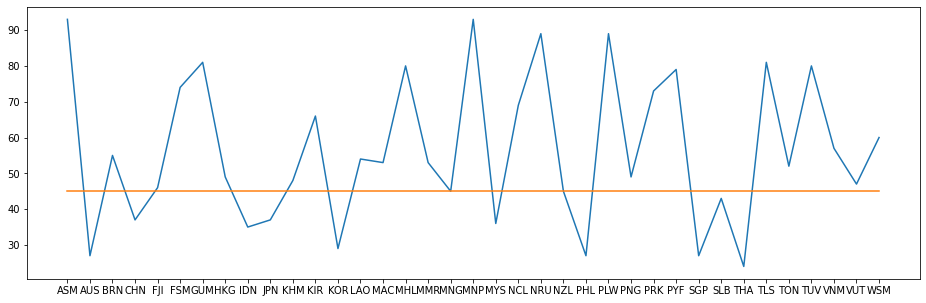

In [ ]:
import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in EAP.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (16,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

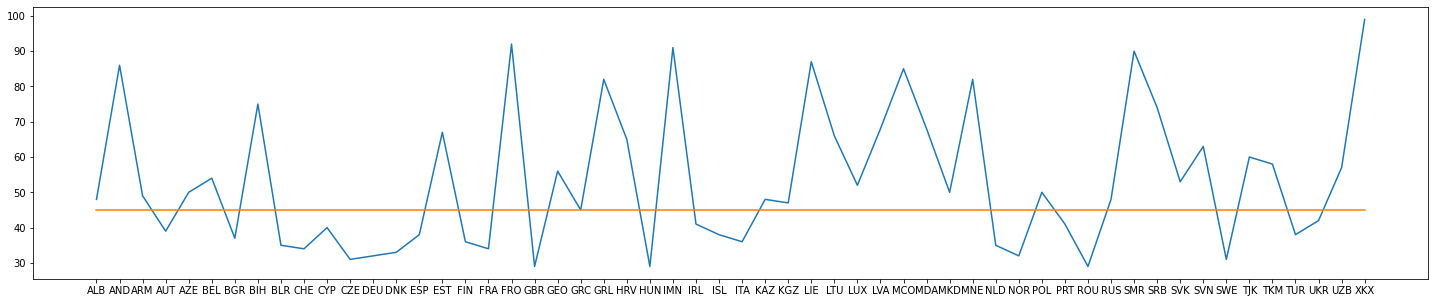

In [ ]:
ECS = countries[countries['region'] == 'Europe & Central Asia']
ECS = ECS.dropna(subset = ['longitude', 'latitude'])

def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in ECS.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (25,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

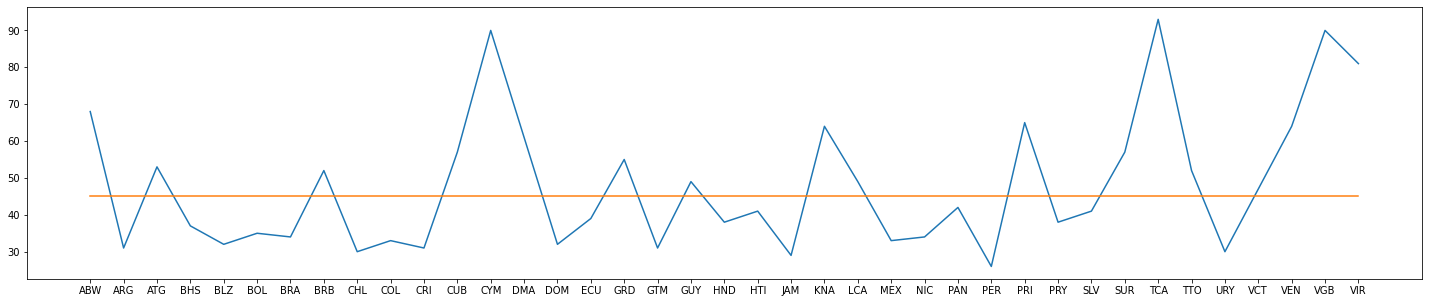

In [ ]:
list1 = []
for i in countries['region']:
  if 'Latin' in i:
    list1.append(True)
  else:
    list1.append(False)

LAC = countries[list1]
LAC = LAC.dropna(subset = ['longitude', 'latitude'])

def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in LAC.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (25,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

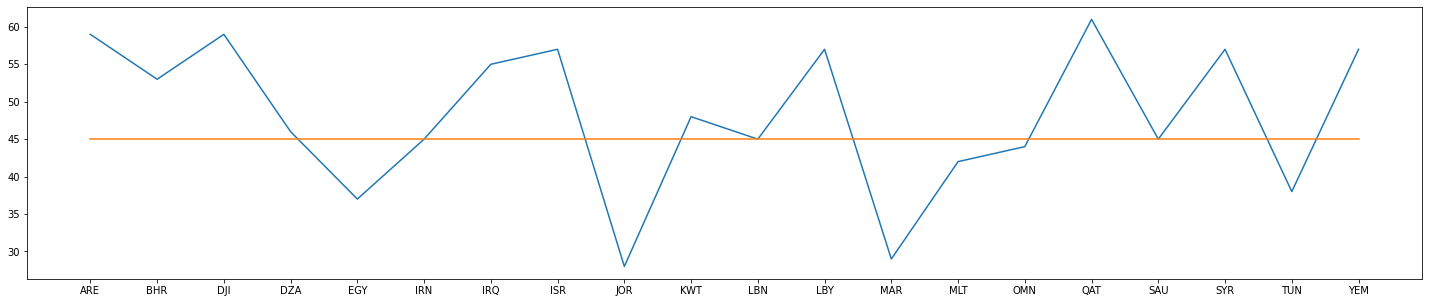

In [ ]:
MEA = countries[countries['region'] == 'Middle East & North Africa']
MEA = MEA.dropna(subset = ['longitude', 'latitude'])

def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in MEA.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (25,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

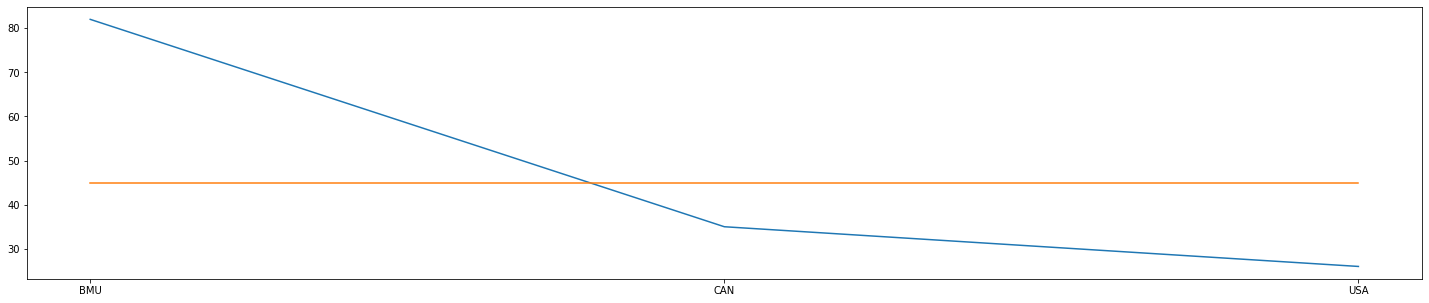

In [ ]:
NAC = countries[countries['region'] == 'North America']
NAC = NAC.dropna(subset = ['longitude', 'latitude'])

def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in NAC.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (25,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

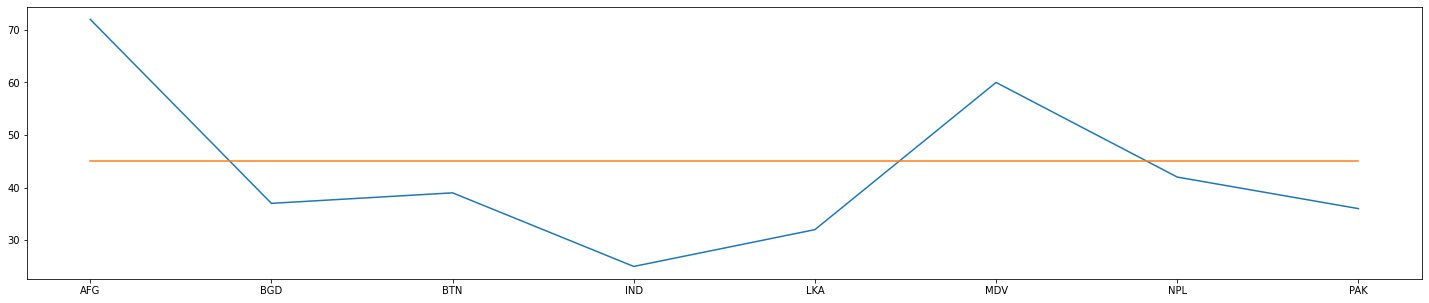

In [ ]:
SAS = countries[countries['region'] == 'South Asia']
SAS = SAS.dropna(subset = ['longitude', 'latitude'])

def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    #print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return len(missing_list)

import matplotlib.pyplot as plt
countries_result = []
id_result = []
for ele in SAS.index:
  countries_result.append(calculate_quality(data.loc[ele,:,:],0.1))
  id_result.append(ele)
fig,ax = plt.subplots(figsize = (25,5))
ax.plot(id_result,countries_result)
ax.plot(id_result,[45 for i in range(len(id_result))])

In [ ]:
chosen = ['AUS','CHN','IDN','JPN','KOR','RMN','MYS','PHL','SGP','SLB','THA',
          'AUT','BGR','BLR','CHE','CYP','CZE','DEU','DNK','ESP','EST','FIN','FRA','FRO','GBR','GRC','HUN','IRL','ISL','ITA','NLD','NOR','ROU','RUS','SWE','TUR','UKR',
          'ARG','BHS','BLZ','BOL','BRA','CHL','COL','CRI','DOM','ECU','GTM','HND','HTI','JAM','MEX','NIC','PAN','PER','PRY','SLV','URY',
          'EGY','JOR','LBN','MAR','MLT','OMN','SAU','TUN','CAN','USA',
          'BGD','BTN','IND','LKA','NPL','PAK']